In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
df=pd.read_csv('happiness.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [23]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [24]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

- There is no null value in the data set 

In [25]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

- There are total 12 columns in the data sets 
- only six columns are used to predict the happyness score (output variable)
- Main input factors considered for prediction of happiness score are Family, Economy, Health, Freedom, Trust, Generisity

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

- There is no null values in the data

# Description of Data

In [27]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


- The mean and median value is nearly similar for Standard error, Family, Freedom etc. so the skewness is not present in the data. 
- There is slight difference between 75% and maximum value so the outliers are present in the data 

[]

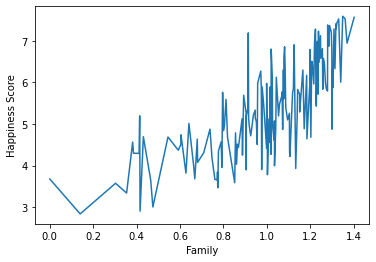

In [28]:
# Relationship between happiness score and Family
sns.lineplot(data=df, x='Family', y='Happiness Score')
plt.plot()

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

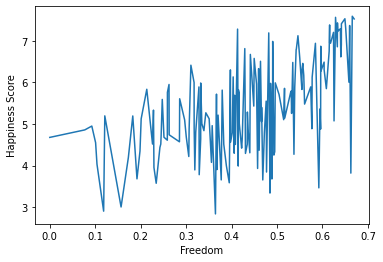

In [29]:
sns.lineplot(data=df, x='Freedom', y='Happiness Score')

- The family and freedom are affected on Happiness score in positive way. The relationship between them is directly proportonal with each other
- The Freedom relation with happiness index with Family is comparatively statble 

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

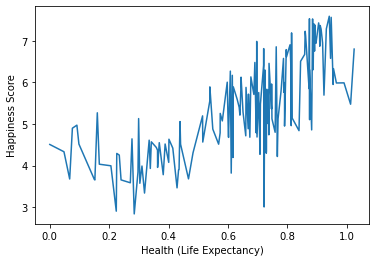

In [30]:
sns.lineplot(data=df,x='Health (Life Expectancy)', y='Happiness Score')

Text(0.5, 1.0, 'Count plot of Region')

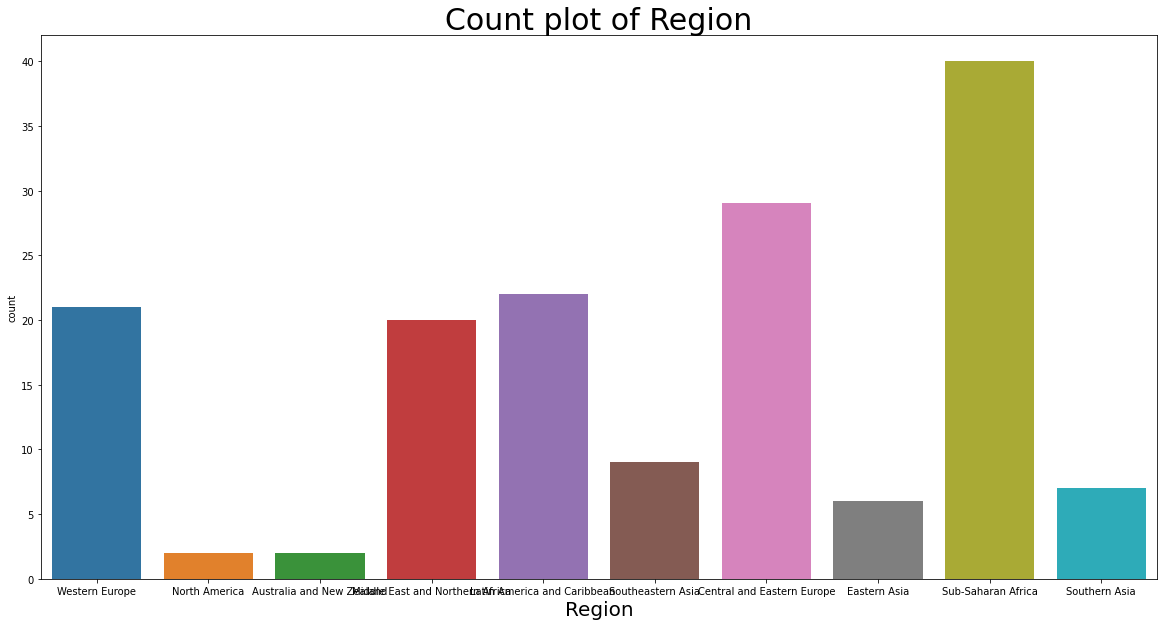

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x= 'Region' )
plt.xlabel('Region',size=20)
plt.title('Count plot of Region',size=30)

- The mejor contries are fall under the data belongs to Sub-Saharan African where Happiness index is very less
- Afterthat Central and Eastern Europe contires are good in number
- Least contries are belongs to North America


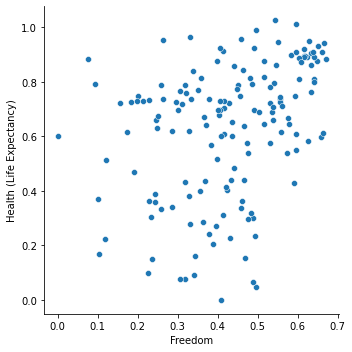

In [32]:
sns.relplot(data=df, x='Freedom', y='Health (Life Expectancy)')

<AxesSubplot:xlabel='Family', ylabel='Economy (GDP per Capita)'>

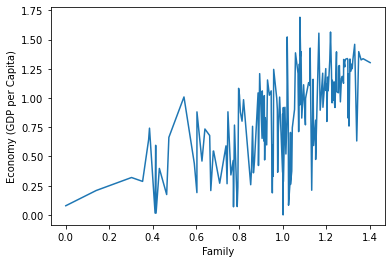

In [33]:
sns.lineplot(x= df['Family'], y=df["Economy (GDP per Capita)"])

In [34]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

- Trust (Government Corruption), Generosity having skewness value slightly higher than the range (-1 to 1) so it need to reduce the skewness for these quantites.
- Also Standard Error is having maximum skewness but that value is not measuarable (direclty gievn) and as per data we have to build the model except that value.

In [35]:
df['Generosity']=np.cbrt(df['Generosity'])

In [36]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                      -0.961079
Dystopia Residual               -0.238911
dtype: float64

In [37]:
df['Trust (Government Corruption)']=np.cbrt(df['Trust (Government Corruption)'])

In [38]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                      -0.961079
Dystopia Residual               -0.238911
dtype: float64

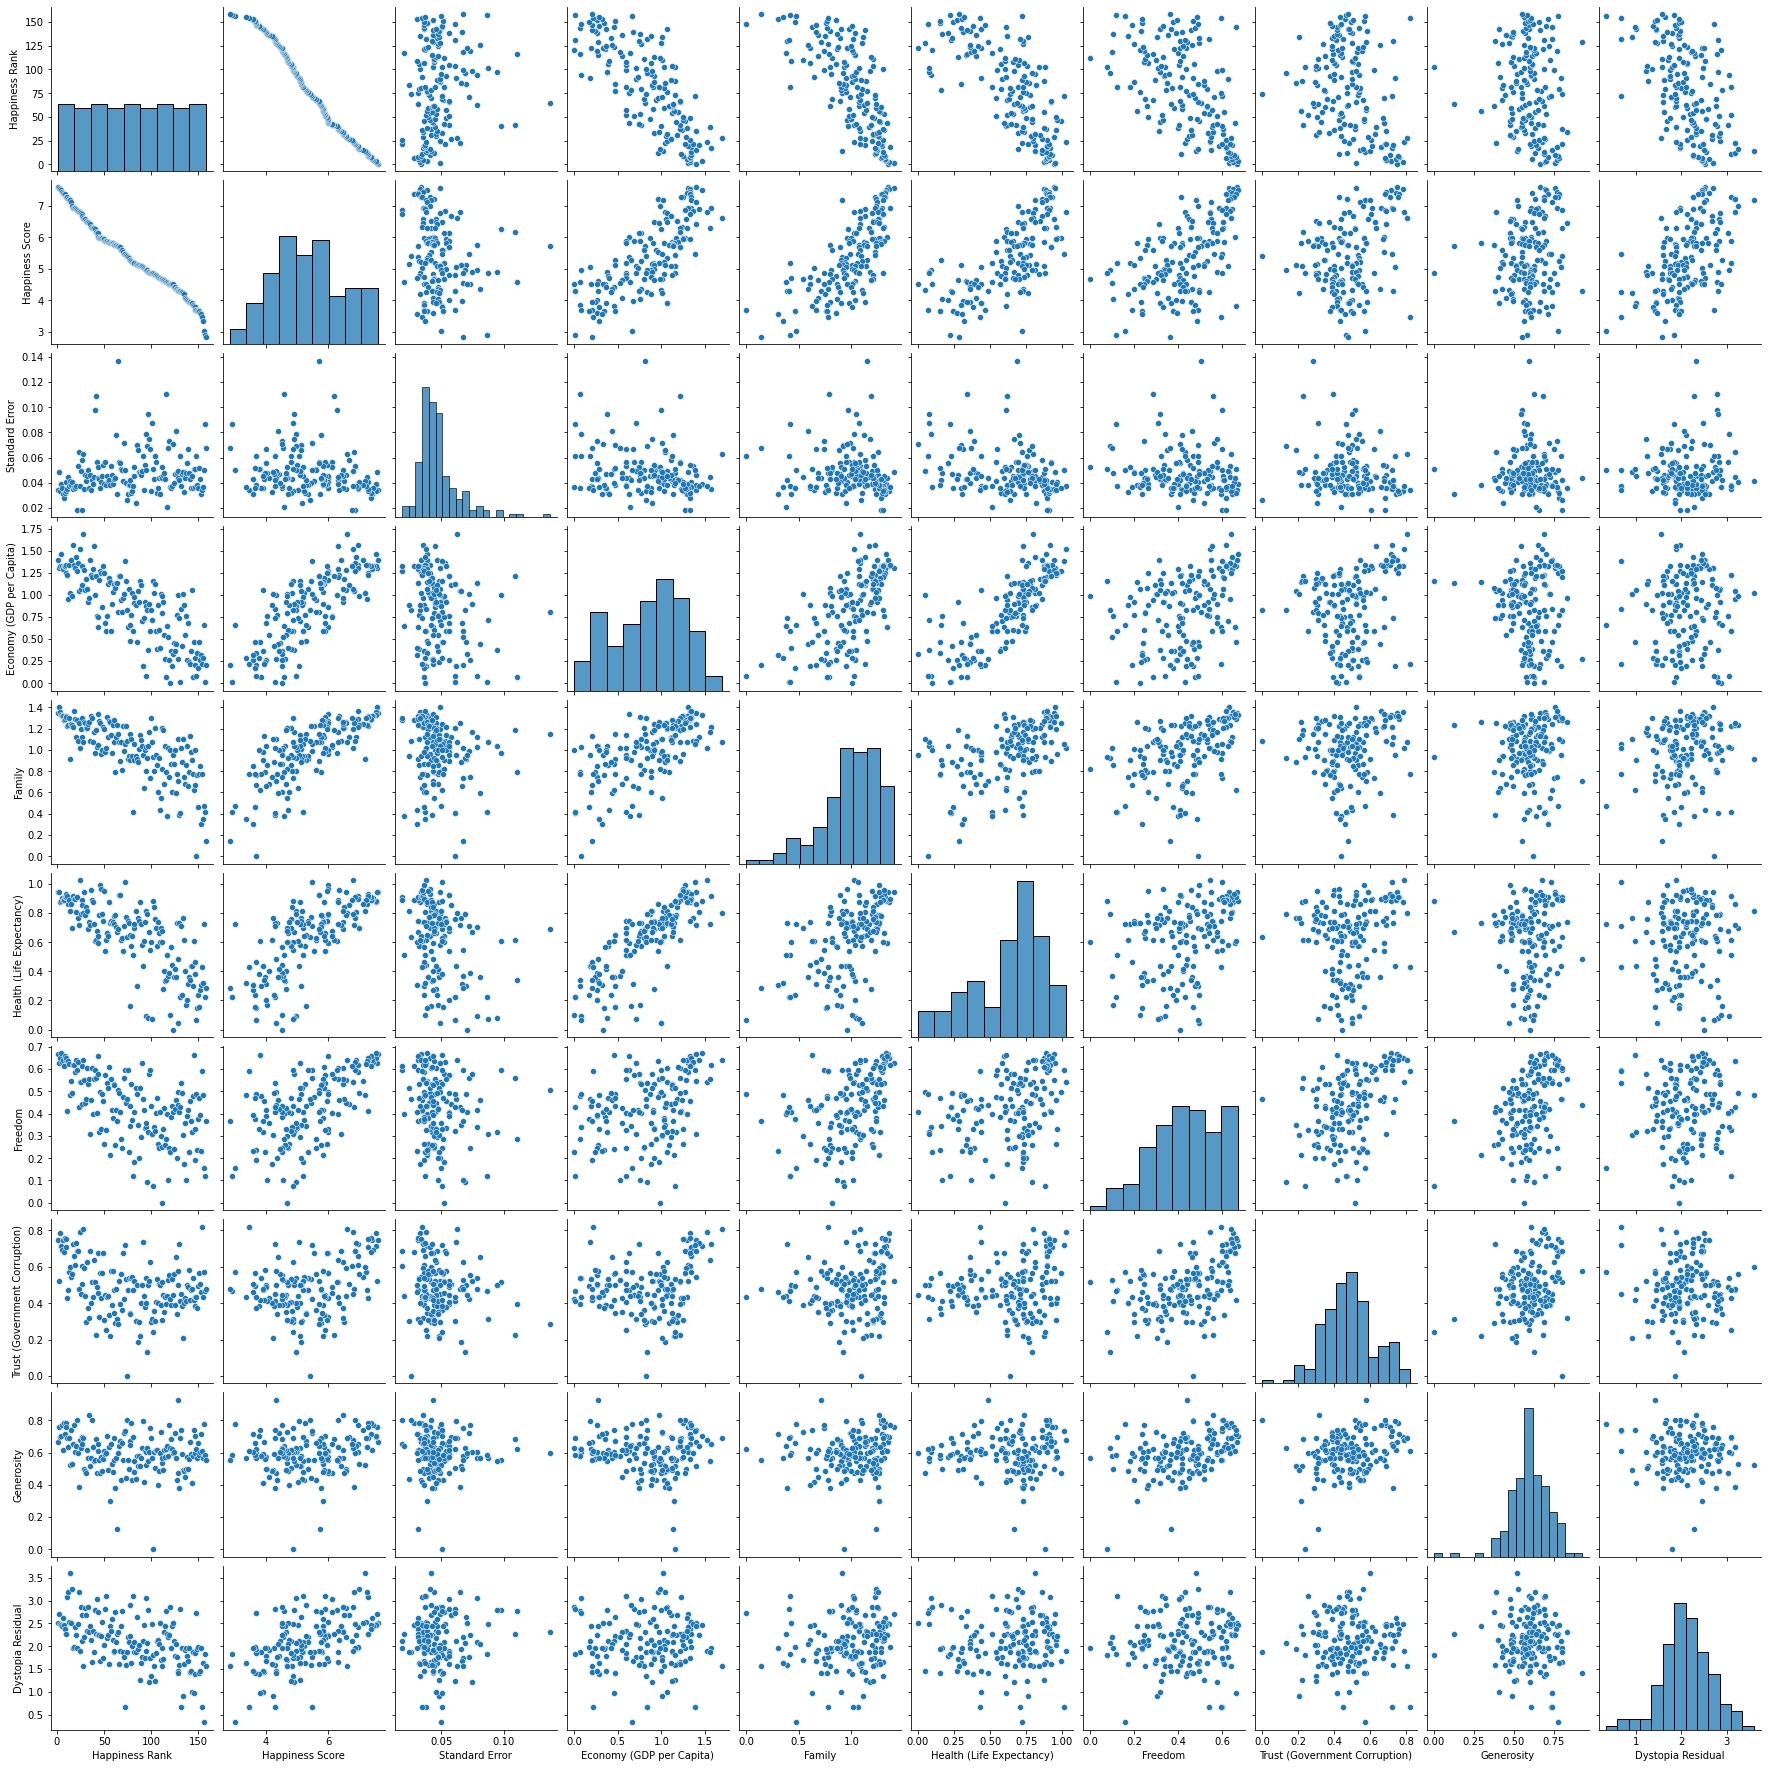

In [39]:
sns.pairplot(df)

- From the above plot all the heads are affected on happiness Score in different manner
- The nature of Health (Life Expectancy), Freedom with respect to Dystopia Residual looks similar in nature 
- Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom these four factors affected posivitely on the Happiness Score 

In [40]:
df1=df.drop('Country', axis=1)
df1=df1.drop('Region',axis=1)
df1

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.748756,0.667029,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.521036,0.758453,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.784910,0.698903,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.714677,0.702704,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.690742,0.770886,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.820269,0.609371,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.431066,0.567327,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.573940,0.778484,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.465116,0.582130,1.83302


In [41]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.721000,1.937360,0.805926,1.369621,1.320281,1.263408,1.577438,1.826993,0.576890,0.758258
1,1.699075,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,0.260958,1.325808,1.092857
2,1.677149,1.884792,0.854487,1.192861,1.361054,0.992229,1.469659,2.075620,0.837993,0.712335
3,1.655224,1.880411,0.531526,1.525130,1.251922,1.035145,1.605131,1.592625,0.869128,0.663893
4,1.633299,1.797179,0.722845,1.194876,1.221204,1.118054,1.360416,1.428028,1.427657,0.639337
...,...,...,...,...,...,...,...,...,...,...
153,1.633576,1.674055,0.774917,1.552987,0.800520,0.818610,1.087740,2.318782,0.104570,2.588925
154,1.655501,1.783571,0.662582,1.392303,2.346860,1.263362,0.372033,0.357762,0.239847,0.843967
155,1.677427,2.076199,0.132534,0.455245,1.901086,0.372199,1.809238,0.624780,1.489900,3.208430
156,1.699352,2.164688,2.263962,2.067566,2.118467,1.649648,2.064472,0.123602,0.118581,0.481985


In [42]:
dfz=df[(z<3).all(axis=1)]
dfz

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.748756,0.667029,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.521036,0.758453,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.784910,0.698903,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.714677,0.702704,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.690742,0.770886,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.504388,0.601358,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.459770,0.714722,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.820269,0.609371,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.431066,0.567327,1.63328


In [43]:
x=dfz.drop('Happiness Score',axis=1)
x=dfz.drop('Region',axis=1)
x

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.748756,0.667029,2.51738
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.521036,0.758453,2.70201
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.784910,0.698903,2.49204
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.714677,0.702704,2.46531
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.690742,0.770886,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
151,Burkina Faso,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.504388,0.601358,1.46494
152,Afghanistan,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.459770,0.714722,1.95210
153,Rwanda,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.820269,0.609371,0.67042
154,Benin,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.431066,0.567327,1.63328


In [44]:
dfz.drop('Country',axis=1, inplace=True)
dfz.drop('Region',axis=1, inplace=True)

In [45]:
dfz.drop('Happiness Rank',axis=1, inplace=True)
x=dfz
x

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.748756,0.667029,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.521036,0.758453,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.784910,0.698903,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.714677,0.702704,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.690742,0.770886,2.45176
...,...,...,...,...,...,...,...,...,...
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.504388,0.601358,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.459770,0.714722,1.95210
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.820269,0.609371,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.431066,0.567327,1.63328


In [52]:
df1=df.corr()
df1

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.304207,-0.141914,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.326229,0.159029,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.162549,-0.032307,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.205482,-0.059576,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.131653,0.066803,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.149556,0.044395,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.461105,0.398210,0.062783
Trust (Government Corruption),-0.304207,0.326229,-0.162549,0.205482,0.131653,0.149556,0.461105,1.000000,0.266991,0.010769
Generosity,-0.141914,0.159029,-0.032307,-0.059576,0.066803,0.044395,0.398210,0.266991,1.000000,-0.061511
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,0.010769,-0.061511,1.000000


<AxesSubplot:>

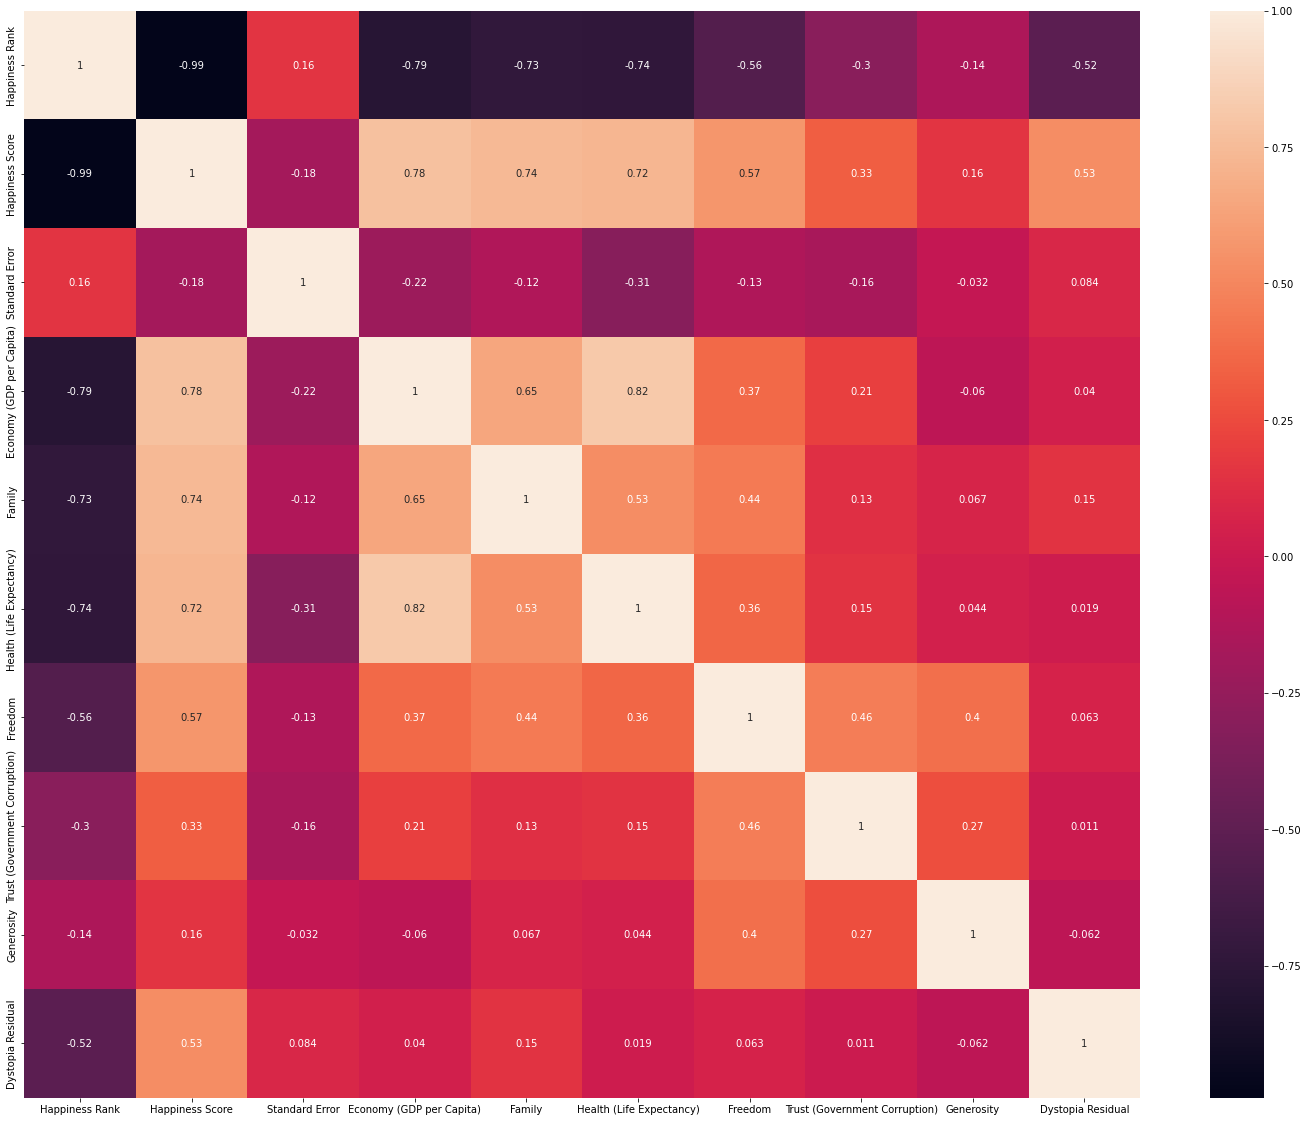

In [54]:
plt.figure(figsize=(25,20))
sns.heatmap(data=df1, annot= True, color='Blue')

In [55]:
x=dfz.drop('Happiness Score', axis=1)
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.748756,0.667029,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.521036,0.758453,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.784910,0.698903,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.714677,0.702704,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.690742,0.770886,2.45176
...,...,...,...,...,...,...,...,...
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.504388,0.601358,1.46494
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.459770,0.714722,1.95210
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.820269,0.609371,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.431066,0.567327,1.63328


In [56]:
y=dfz['Happiness Score']
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
151    3.587
152    3.575
153    3.465
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Linear Regression

In [58]:
lr=LinearRegression()

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=51)

In [60]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((104, 8), (45, 8), (104,), (45,))

In [61]:
lr.fit(x_train,y_train)

LinearRegression()

In [62]:
y_pre=lr.predict(x_test)

In [63]:
lr.coef_

array([-0.20190919,  1.01173635,  1.02564446,  1.03595837,  0.95116971,
        0.83558318,  1.14969684,  0.97658816])

In [64]:
lr.intercept_

-0.6914546674771964

In [65]:
mean_absolute_error(y_test,y_pre)

0.033815459328194186

In [66]:
mean_squared_error(y_test,y_pre)

0.001828976906157266

# Decision Tree Regression

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
DTR=DecisionTreeRegressor()

In [69]:
DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [70]:
Y_dtr=DTR.predict(x_test)

In [71]:
mean_absolute_error(y_test,Y_dtr)

0.4429999999999999

In [72]:
mean_squared_error(y_test,Y_dtr)

0.2978443333333333

# Random Forest Regressor 

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rfr=RandomForestRegressor()

In [75]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [76]:
y_rfr=rfr.predict(x_test)

In [77]:
mean_absolute_error(y_test,y_rfr)

0.2582157777777784

In [78]:
mean_squared_error(y_test,y_rfr)

0.12077867099777784

# Support Vector Regressor

In [79]:
from sklearn.svm import SVR

In [80]:
svr=SVR()

In [81]:
svr.fit(x_train,y_train)

SVR()

In [82]:
y_svr=svr.predict(x_test)

In [83]:
mean_absolute_error(y_test,y_svr)

0.07579312562408708

In [84]:
mean_squared_error(y_test,y_svr)

0.00877042296119874

# Polynomial Regession

In [85]:
from sklearn.preprocessing import PolynomialFeatures

In [86]:
poly_reg=PolynomialFeatures(degree=3)

In [87]:
x_poly=poly_reg.fit_transform(x)

In [88]:
lin_reg=LinearRegression()

In [89]:
lin_reg.fit(x_poly,y)

LinearRegression()

In [90]:
lin_reg.intercept_

0.0029627955754296664

In [91]:
lin_reg.coef_

array([-8.45741532e-11, -5.59818898e-01,  1.01555253e+00,  1.02899663e+00,
        8.01134439e-01,  8.87750085e-01, -7.29845506e-03,  1.27922195e-01,
        1.03927870e+00, -1.41911598e-01,  1.47922367e-01,  2.57562289e-01,
        5.99319830e-01,  2.41768021e-01,  4.06878957e-01, -1.99061514e-02,
       -6.96455960e-02,  7.89069347e-02, -2.29365215e-01, -1.68644828e-01,
        9.90430198e-02,  3.27679205e-02,  1.31366576e-01,  1.14528307e-02,
        8.79006641e-02,  3.59653198e-01,  1.49487950e-01, -3.73881311e-02,
       -3.71332171e-01, -4.71205842e-02,  1.47643198e-01, -2.34506682e-01,
        6.53058360e-03,  9.14517604e-02,  2.06448164e-03, -2.17392301e-01,
       -1.75480595e-01,  3.75725251e-01,  7.20334845e-02,  1.35143399e-01,
       -1.03837354e-01,  1.03388748e-03,  4.66991330e-02, -1.10874254e-01,
        5.54281427e-05,  1.09143913e-03, -1.81192034e-01,  7.20060026e-02,
        1.19232032e-01, -2.75098292e-02,  6.74412816e-02,  1.33505885e-01,
        2.37241072e-01, -

## The Best suitbale model for predicting Happiness index is Linear Regression 